# Part I - (ProsperLoanData Exploration)
## by (Gift Okereke)

## Introduction
> This data set contains some 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. For the the purpose of this project, I will be exploring around 15 variables in this dataset to gain insight into the data. I will try to find out what factors affect a loan’s outcome status.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

%matplotlib inline

> I will be loading the dataset, also exploring some of its properties


In [2]:
# Loading dataset and exploring the properties

selected_cols = ['LoanKey', 'Term', 'LoanStatus', 'LoanOriginalAmount', 'ListingCategory (numeric)', 'ProsperRating (numeric)',
                 'ProsperRating (Alpha)', 'ProsperScore', 'BorrowerRate', 'Occupation', 'StatedMonthlyIncome', 'EmploymentStatus',
                 "DelinquenciesLast7Years", "CurrentDelinquencies"]

prosper_loan = pd.read_csv("prosperLoanData.csv", usecols=selected_cols)
prosper_loan = prosper_loan.reindex(columns=selected_cols)

n_rows, n_cols = prosper_loan.shape
print(f"The dataset has {n_rows} rows and {n_cols} columns")
print()
print(prosper_loan.dtypes)
prosper_loan.head()

The dataset has 113937 rows and 14 columns

LoanKey                       object
Term                           int64
LoanStatus                    object
LoanOriginalAmount             int64
ListingCategory (numeric)      int64
ProsperRating (numeric)      float64
ProsperRating (Alpha)         object
ProsperScore                 float64
BorrowerRate                 float64
Occupation                    object
StatedMonthlyIncome          float64
EmploymentStatus              object
DelinquenciesLast7Years      float64
CurrentDelinquencies         float64
dtype: object


,LoanKey,Term,LoanStatus,LoanOriginalAmount,ListingCategory (numeric),ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,BorrowerRate,Occupation,StatedMonthlyIncome,EmploymentStatus,DelinquenciesLast7Years,CurrentDelinquencies
0,E33A3400205839220442E84,36,Completed,9425,0,NaN,NaN,NaN,0.1580,Other,3083.333333,Self-employed,4.0,2.0
1,9E3B37071505919926B1D82,36,Current,10000,2,6.0,A,7.0,0.0920,Professional,6125.000000,Employed,0.0,0.0
2,6954337960046817851BCB2,36,Completed,3001,0,NaN,NaN,NaN,0.2750,Other,2083.333333,Not available,0.0,1.0
3,A0393664465886295619C51,36,Current,10000,16,6.0,A,9.0,0.0974,Skilled Labor,2875.000000,Employed,14.0,4.0
4,A180369302188889200689E,36,Current,15000,2,3.0,D,4.0,0.2085,Executive,9583.333333,Employed,0.0,0.0


#### Checking duplicates with then `LoanKey` column

In [3]:
# checking duplicates
prosper_loan.LoanKey.duplicated().sum()

871

There are `871` duplicates

In [4]:
# Removing  the duplicates
prosper_loan.drop_duplicates(subset="LoanKey", inplace=True)
prosper_loan.LoanKey.duplicated().sum()

0

I want rename some of the attributes names to make them easier to work with

In [5]:
# Renaming some of the column names
columns = {
    'LoanOriginalAmount': 'LoanAmount',
    'ListingCategory (numeric)': 'ListingCategory',
    'ProsperRating (numeric)': 'ProsperRatingNumeric',
    'ProsperRating (Alpha)': 'ProsperRatingAlpha',
    'ListingCreationDate': 'ListingDate',
    'IsBorrowerHomeowner': 'Homeowner',
    'StatedMonthlyIncome': 'MonthlyIncome'}
prosper_loan.rename(columns=columns, inplace = True)
prosper_loan.columns

Index(['LoanKey', 'Term', 'LoanStatus', 'LoanAmount', 'ListingCategory',
       'ProsperRatingNumeric', 'ProsperRatingAlpha', 'ProsperScore',
       'BorrowerRate', 'Occupation', 'MonthlyIncome', 'EmploymentStatus',
       'DelinquenciesLast7Years', 'CurrentDelinquencies'],
      dtype='object')

I want to make `ListingCategory` more descriptive

In [6]:
# Creating a dictionary of Listing Category 
listing_cat = {
    0:'Not Available', 1:'Debt Consolidation', 2:'Home Improvement', 3:'Business', 4:'Personal Loan',
    5:'Student', 6:'Auto', 7:'Other', 8:'Baby&Adoption', 9:'Boat', 10:'Cosmetic Procedure', 
    11: 'Engagement Ring', 12:'Green Loans', 13:'Household Expenses', 14:'Large Purchases',
    15:'Medical/Dental', 16:'Motorcycle', 17:'RV', 18:'Taxes', 19:'Vacation', 20:'Wedding Loans'
}

#Changing the column to make it descriptive
prosper_loan["ListingCategory"] = prosper_loan.ListingCategory.apply(lambda x: listing_cat[x] if x in listing_cat else x )

In [7]:
prosper_loan.ListingCategory.value_counts()

Debt Consolidation    57624
Not Available         16965
Other                 10448
Home Improvement       7388
Business               7157
Auto                   2568
Personal Loan          2395
Household Expenses     1987
Medical/Dental         1507
Taxes                   882
Large Purchases         863
Vacation                764
Wedding Loans           762
Student                 756
Motorcycle              304
Engagement Ring         214
Baby&Adoption           196
Cosmetic Procedure       91
Boat                     85
Green Loans              58
RV                       52
Name: ListingCategory, dtype: int64

I now want to change the column to ordinal categorical datatype

In [8]:
# Changing the ProsperRatingAlpha to ordered category
cat_list =  ['N/A','HR', 'E', 'D', 'C', 'B','A', 'AA',]
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = cat_list)
prosper_loan['ProsperRatingAlpha'] = prosper_loan['ProsperRatingAlpha'].astype(ordered_cat)

In [9]:
# Changing the `ListingDate` to datetime datatype
#prosper_loan["ListingDate"] = pd.to_datetime(prosper_loan.ListingDate, format="%Y-%m-%d %H:%M:%S")

In [10]:
prosper_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113066 entries, 0 to 113936
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   LoanKey                  113066 non-null  object  
 1   Term                     113066 non-null  int64   
 2   LoanStatus               113066 non-null  object  
 3   LoanAmount               113066 non-null  int64   
 4   ListingCategory          113066 non-null  object  
 5   ProsperRatingNumeric     83982 non-null   float64 
 6   ProsperRatingAlpha       83982 non-null   category
 7   ProsperScore             83982 non-null   float64 
 8   BorrowerRate             113066 non-null  float64 
 9   Occupation               109537 non-null  object  
 10  MonthlyIncome            113066 non-null  float64 
 11  EmploymentStatus         110811 non-null  object  
 12  DelinquenciesLast7Years  112076 non-null  float64 
 13  CurrentDelinquencies     112369 non-null  fl

Let me now work on the `Null` values. 

First, I will change the missing values in the categorical variables to `N/A`, and

In [11]:
#selecting the categorical variables
cat_vars = prosper_loan.select_dtypes(include=["object", "category"]).columns

# Replacing nulls with N/A
for var in cat_vars:
    prosper_loan[var].fillna("N/A", inplace=True)
prosper_loan.select_dtypes(include=["object", "category"]).isnull().sum()

LoanKey               0
LoanStatus            0
ListingCategory       0
ProsperRatingAlpha    0
Occupation            0
EmploymentStatus      0
dtype: int64

Let me now work on numerical variables, It seems most of the null values are coming from `ProsperRatingNumeric`and `ProsperScore` variables, so I will fill the null values with the median values in those variables.

In [12]:
# selecting the variables
var_list = ["ProsperRatingNumeric", "ProsperScore"]

# Replacing the nulls with the median value
for var in var_list:
    prosper_loan[var].fillna(prosper_loan[var].median(), inplace=True)

prosper_loan[var_list].isnull().sum()

ProsperRatingNumeric    0
ProsperScore            0
dtype: int64

In [13]:
prosper_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113066 entries, 0 to 113936
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   LoanKey                  113066 non-null  object  
 1   Term                     113066 non-null  int64   
 2   LoanStatus               113066 non-null  object  
 3   LoanAmount               113066 non-null  int64   
 4   ListingCategory          113066 non-null  object  
 5   ProsperRatingNumeric     113066 non-null  float64 
 6   ProsperRatingAlpha       113066 non-null  category
 7   ProsperScore             113066 non-null  float64 
 8   BorrowerRate             113066 non-null  float64 
 9   Occupation               113066 non-null  object  
 10  MonthlyIncome            113066 non-null  float64 
 11  EmploymentStatus         113066 non-null  object  
 12  DelinquenciesLast7Years  112076 non-null  float64 
 13  CurrentDelinquencies     112369 non-null  fl

I will drop the remaining `Null` values

In [14]:
#Dropping null values
prosper_loan = prosper_loan.dropna()

In [15]:
prosper_loan.isnull().sum()

LoanKey                    0
Term                       0
LoanStatus                 0
LoanAmount                 0
ListingCategory            0
ProsperRatingNumeric       0
ProsperRatingAlpha         0
ProsperScore               0
BorrowerRate               0
Occupation                 0
MonthlyIncome              0
EmploymentStatus           0
DelinquenciesLast7Years    0
CurrentDelinquencies       0
dtype: int64

In [16]:
prosper_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112076 entries, 0 to 113936
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   LoanKey                  112076 non-null  object  
 1   Term                     112076 non-null  int64   
 2   LoanStatus               112076 non-null  object  
 3   LoanAmount               112076 non-null  int64   
 4   ListingCategory          112076 non-null  object  
 5   ProsperRatingNumeric     112076 non-null  float64 
 6   ProsperRatingAlpha       112076 non-null  category
 7   ProsperScore             112076 non-null  float64 
 8   BorrowerRate             112076 non-null  float64 
 9   Occupation               112076 non-null  object  
 10  MonthlyIncome            112076 non-null  float64 
 11  EmploymentStatus         112076 non-null  object  
 12  DelinquenciesLast7Years  112076 non-null  float64 
 13  CurrentDelinquencies     112076 non-null  fl

In [17]:
prosper_loan.describe()

,Term,LoanAmount,ProsperRatingNumeric,ProsperScore,BorrowerRate,MonthlyIncome,DelinquenciesLast7Years,CurrentDelinquencies
count,112076.000000,112076.000000,112076.000000,112076.000000,112076.000000,1.120760e+05,112076.000000,112076.000000
mean,40.842571,8348.088208,4.051483,5.964685,0.193074,5.607109e+03,4.158892,0.589877
std,10.457632,6242.835314,1.450631,2.055036,0.074893,7.514265e+03,10.163465,1.968668
min,12.000000,1000.000000,1.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,36.000000,4000.000000,3.000000,5.000000,0.134600,3.208333e+03,0.000000,0.000000
50%,36.000000,6500.000000,4.000000,6.000000,0.184000,4.666667e+03,0.000000,0.000000
75%,36.000000,12000.000000,5.000000,7.000000,0.251100,6.829167e+03,3.000000,0.000000
max,60.000000,35000.000000,7.000000,11.000000,0.360000,1.750003e+06,99.000000,83.000000


## What is the structure of your dataset?

This data set contains some 113,937 loans with 81 variables on each loan, But, For the the purpose of this project, I selected around 13 variables (LoanKey, Term, LoanStatus, LoanOriginalAmount, ListingCategory (numeric), ProsperRating (Alpha), ListingCreationDate, BorrowerRate, IsBorrowerHomeowner, Occupation, StatedMonthlyIncome, EmploymentStatus, DelinquenciesLast7Years and CurrentDeliquencies). It has numeric, categorical and also boolean datatype. The ProsperRating (Alpha) has an ordered level like so:


worst -----> best<br>
HR ------ AA

### What is/are the main feature(s) of interest in your dataset?

In this project, I'm most interested in the features that can be used to best predict LoanStatus.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that monthly income, employment status, ProsperRating (numeric), ProsperScore, DelinquenciesLast7Years, CurrentDeliquencies and listing category will have a to a greater degree an effect LoanStatus.

Before starting my exploration of the data, I want to dive deep into the variable of interest `LoanStatus`

In [18]:
prosper_loan.LoanStatus.value_counts()

Current                   55730
Completed                 37417
Chargedoff                11872
Defaulted                  4795
Past Due (1-15 days)        800
Past Due (31-60 days)       361
Past Due (61-90 days)       311
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      203
Past Due (>120 days)         16
Cancelled                     2
Name: LoanStatus, dtype: int64

Looking at the loan status, we can see that we really want are loans that have either been completed or defaulted, we don't need loans that are currently running, since we cant tell the outcomes. So for loans that are `passed Due`, `charged off`, `Cancelled`, and `FinalPaymentInProgress`, I will group them as `Defaulted`. I will set these groups completed as 1, and defaulted as 0.

In [19]:
# Removing current loans
prosper_loan_clean = prosper_loan[prosper_loan.LoanStatus != "Current"]
prosper_loan_clean.LoanStatus.value_counts()

Completed                 37417
Chargedoff                11872
Defaulted                  4795
Past Due (1-15 days)        800
Past Due (31-60 days)       361
Past Due (61-90 days)       311
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      203
Past Due (>120 days)         16
Cancelled                     2
Name: LoanStatus, dtype: int64

In [20]:
# encoding completed as 1 and defaulted as 0
prosper_loan_clean["LoanStatus"] = (prosper_loan_clean.LoanStatus == "Completed").astype(int)
prosper_loan_clean.LoanStatus.unique()

C:\Users\Russell\AppData\Local\Temp\ipykernel_8944\1774638947.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prosper_loan_clean["LoanStatus"] = (prosper_loan_clean.LoanStatus == "Completed").astype(int)


array([1, 0])

In [21]:
prosper_loan_clean.ProsperRatingNumeric.value_counts()

4.0    32426
3.0     6352
2.0     4233
1.0     4034
6.0     3795
5.0     3687
7.0     1819
Name: ProsperRatingNumeric, dtype: int64

In [22]:
prosper_loan.describe()

,Term,LoanAmount,ProsperRatingNumeric,ProsperScore,BorrowerRate,MonthlyIncome,DelinquenciesLast7Years,CurrentDelinquencies
count,112076.000000,112076.000000,112076.000000,112076.000000,112076.000000,1.120760e+05,112076.000000,112076.000000
mean,40.842571,8348.088208,4.051483,5.964685,0.193074,5.607109e+03,4.158892,0.589877
std,10.457632,6242.835314,1.450631,2.055036,0.074893,7.514265e+03,10.163465,1.968668
min,12.000000,1000.000000,1.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,36.000000,4000.000000,3.000000,5.000000,0.134600,3.208333e+03,0.000000,0.000000
50%,36.000000,6500.000000,4.000000,6.000000,0.184000,4.666667e+03,0.000000,0.000000
75%,36.000000,12000.000000,5.000000,7.000000,0.251100,6.829167e+03,3.000000,0.000000
max,60.000000,35000.000000,7.000000,11.000000,0.360000,1.750003e+06,99.000000,83.000000


## Univariate Exploration

Let me create a custom function that will used for setting up the graph

In [23]:
# Choosing the color of the graph all round
base_color = sns.color_palette()[0]


def graph_settings(title, xlabel="", ylabel=""):

    plt.figure(figsize=(8,5))
    
    plt.title(title, fontsize=18, fontweight='bold')
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)

I will check the distribution of the variable of interest: `LoanStatus`

#### What is the distribution of loan status of the borrowers?

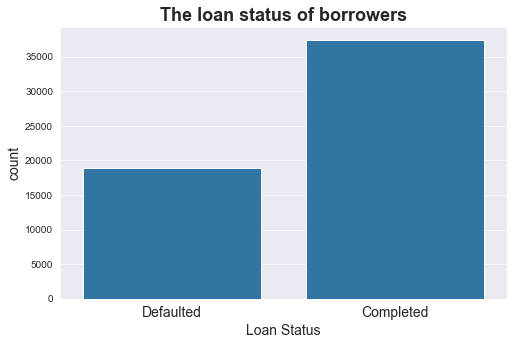

In [24]:
# Plotting the graph
graph_settings("The loan status of borrowers")
graph = sns.countplot(data=prosper_loan_clean, x="LoanStatus", color=base_color)
graph.set_xlabel("Loan Status")
graph.set_xticklabels(["Defaulted", "Completed"], fontsize=14);

#### Observation:

The graph above shows that more than half of the borrows completed their loans.

#### What is the distribution of deliquencies in past 7 years?

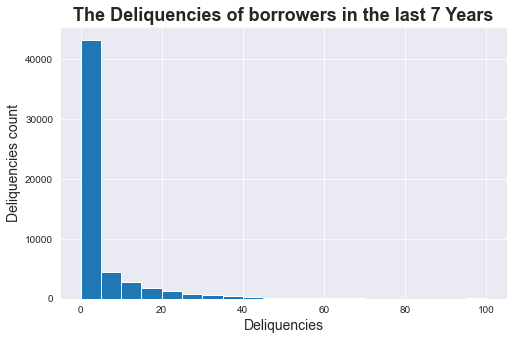

In [25]:
graph_settings("The Deliquencies of borrowers in the last 7 Years", "Deliquencies", "Deliquencies count")
bin_size = 5
bins = np.arange(0, prosper_loan_clean.DelinquenciesLast7Years.max()+bin_size, bin_size)
plt.hist(data=prosper_loan_clean, x="DelinquenciesLast7Years", bins=bins);

The graph is skewed to the right, Let me do a log transformation on the data.

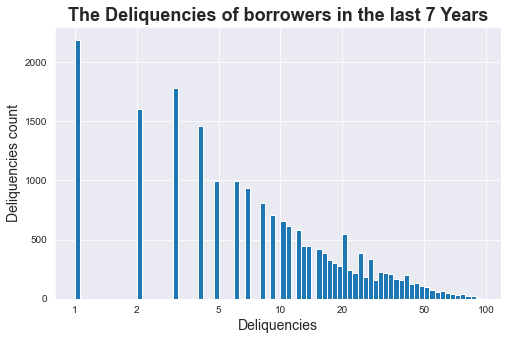

In [26]:
# applying log transformation on the data
graph_settings("The Deliquencies of borrowers in the last 7 Years", "Deliquencies", "Deliquencies count")
binsize = 0.025
bins = 10 ** np.arange(0, np.log10(prosper_loan_clean.DelinquenciesLast7Years.max()+binsize), binsize)
plt.hist(data = prosper_loan_clean, x = 'DelinquenciesLast7Years', bins = bins)
plt.xscale('log')
plt.xticks([1, 2, 5, 10, 20, 50, 100], [1, 2, 5, 10, 20, 50, 100]);

#### Observatioons

This graph is more insightful, It shows that most customers did not have any deliquencies on their loans. it also shows that those have deliquencies, the deliquencies are between 1 and 4.

#### What is the current deliquencies of borrowers

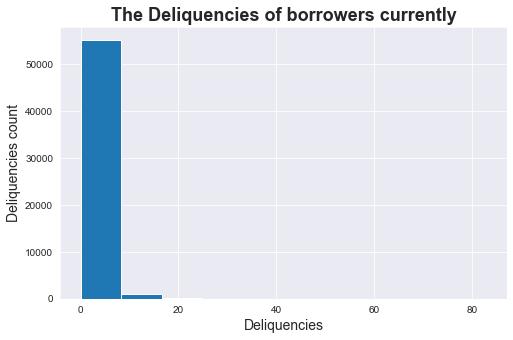

In [27]:
graph_settings("The Deliquencies of borrowers currently", "Deliquencies", "Deliquencies count")
bin_size = 5
bins = np.arange(0, prosper_loan_clean.CurrentDelinquencies.max()+bin_size, bin_size)
plt.hist(data=prosper_loan_clean, x="CurrentDelinquencies");

#### The graph is skewed to the right, Let me do a log transformation on the data.

C:\Users\Russell\AppData\Local\Temp\ipykernel_8944\1944191144.py:7: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0, 50)


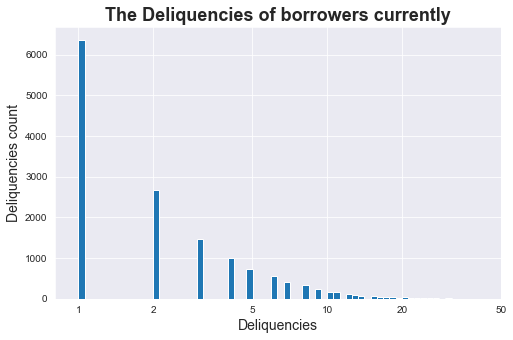

In [28]:
# applying log transformation on the data
graph_settings("The Deliquencies of borrowers currently", "Deliquencies", "Deliquencies count")
binsize = 0.025
bins = 10 ** np.arange(0, np.log10(prosper_loan_clean.CurrentDelinquencies.max()+binsize), binsize)
plt.hist(data = prosper_loan_clean, x = 'CurrentDelinquencies', bins = bins)
plt.xscale('log')
plt.xlim(0, 50)
plt.xticks([1,2, 5, 10, 20, 50], [1, 2, 5, 10, 20, 50]);

#### Observations:

As with `DelinquenciesLast7Years`,  most customers did not have any deliquencies on their loans. it also shows that those have multiple deliquencies are not much.

#### Which prosper rating has the most representation in the dataset?

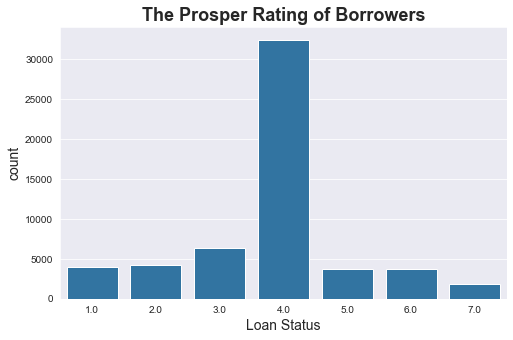

In [29]:
# Plotting the graph
graph_settings("The Prosper Rating of Borrowers")
graph = sns.countplot(data=prosper_loan_clean, x="ProsperRatingNumeric", color=base_color)
graph.set_xlabel("Loan Status");

#### Observations:

From the above graph, we can see that `7`(`AA`) has the lowest representation in the dataset, even though it is the top rating. with the `C` (`4`) rating having the highest representation in the dataset. 

#### What is the distribution of prosper score?

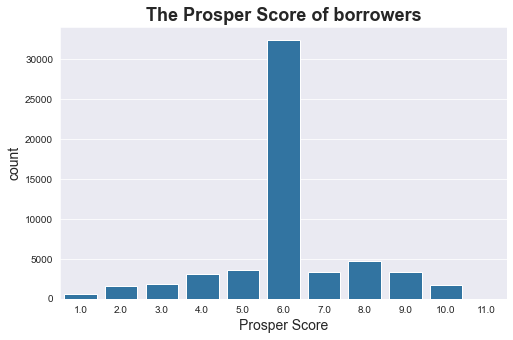

In [30]:
# Plotting the graph
graph_settings("The Prosper Score of borrowers")
graph = sns.countplot(data=prosper_loan_clean, x="ProsperScore", color=base_color)
graph.set_xlabel("Prosper Score");

#### Observations:

The graph shows that `6` is the overwhelming score for most borrowers, surprisingly, `8`, `9`, and `10` has more representation than `11`.

#### How is monthly Income of borrowers distributed?

Next, I will plot the distributions of the predictor variables starting with `MonthlyIncome` variable

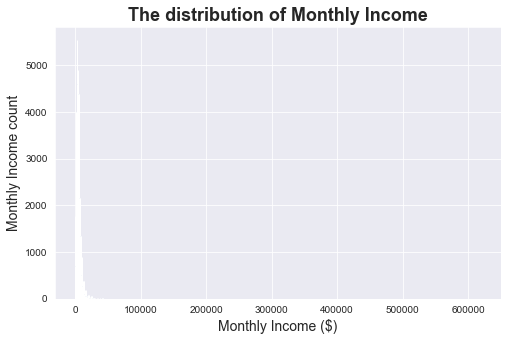

In [31]:
graph_settings("The distribution of Monthly Income", "Monthly Income ($)", "Monthly Income count")
bin_size = 500
bins = np.arange(0, prosper_loan_clean.MonthlyIncome.max()+bin_size, bin_size)
plt.hist(data=prosper_loan_clean, x="MonthlyIncome", bins=bins );
#plt.xlim(0, 50000)

The above plot shows that there are a lot of outliers, most of the data is set to the far left of their axes, suggesting some strong outliers on the right. It's worth taking a bit of time to identify these outliers and see if they need to be filtered out of the data.

In [32]:
# filtering for high outliers, using criteria eyeballed from the plots
high_outliers = prosper_loan_clean.MonthlyIncome > 5e4
print(high_outliers.sum())

prosper_loan_clean.loc[high_outliers, :]

40


,LoanKey,Term,LoanStatus,LoanAmount,ListingCategory,ProsperRatingNumeric,ProsperRatingAlpha,ProsperScore,BorrowerRate,Occupation,MonthlyIncome,EmploymentStatus,DelinquenciesLast7Years,CurrentDelinquencies
4691,729E36602627368539B3613,36,1,13000,Debt Consolidation,6.0,A,8.0,0.0974,Attorney,75000.000000,Employed,0.0,0.0
8066,B7F13618099831699F10189,36,1,2000,Debt Consolidation,1.0,HR,4.0,0.3199,Police Officer/Correction Officer,416666.666667,Employed,2.0,5.0
8870,07DC3375769059207AD374E,36,0,12500,Not Available,4.0,N/A,6.0,0.1200,Other,208333.333333,Not available,0.0,0.0
11312,A2543384093280424BEEAC7,36,1,3000,Not Available,4.0,N/A,6.0,0.0800,Realtor,75000.000000,Full-time,0.0,0.0
15355,1F0C34282899612781EB0DB,36,1,1000,Other,4.0,N/A,6.0,0.1645,Other,83333.333333,Retired,2.0,1.0
15814,5CA93400068350488D356D0,36,0,25000,Not Available,4.0,N/A,6.0,0.2100,Construction,58616.666667,Full-time,0.0,0.0
17411,77AC3617940949299F18FAF,36,1,7500,Debt Consolidation,2.0,E,5.0,0.3199,Professional,483333.333333,Employed,5.0,0.0
17598,229D337594937875593F399,36,1,2500,Not Available,4.0,N/A,6.0,0.0800,Analyst,61000.000000,Not available,0.0,2.0
20708,5C5E3666638847114F4A1D6,36,1,15000,Other,4.0,C,7.0,0.2099,Executive,78364.416667,Employed,0.0,0.0
21250,124836300367946896B7442,36,1,8797,Debt Consolidation,6.0,A,10.0,0.1390,Investor,53333.333333,Employed,0.0,0.0


There are `40` outliers with high values, There seem to be no issue with this data points, most of  the borrowers professionals like Doctors, Engineers, Nurses, also we have attorneys Executives and Investers. It seems the income quoted are yearly income as against monthly income.

I will remove these data points

In [33]:
# Removing the high outliers
prosper_loan_monthly = prosper_loan_clean.loc[-high_outliers, :]

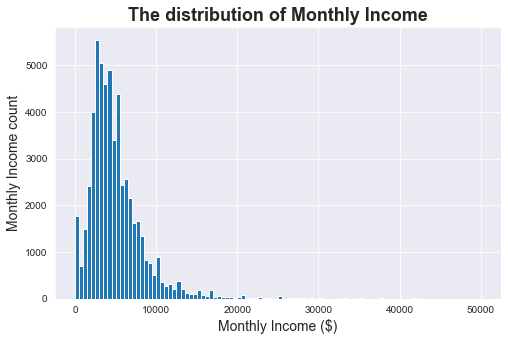

In [34]:
graph_settings("The distribution of Monthly Income", "Monthly Income ($)", "Monthly Income count")
bin_size = 500
bins = np.arange(0, prosper_loan_monthly.MonthlyIncome.max()+bin_size, bin_size)
plt.hist(data=prosper_loan_monthly, x="MonthlyIncome", bins=bins);
#plt.xlim(0, 5000);

There's a long tail in the distribution, so I will put it on a log scale.


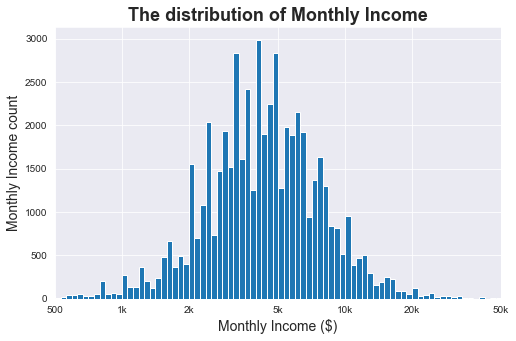

In [35]:
# applying log transformation on the data
graph_settings("The distribution of Monthly Income", "Monthly Income ($)", "Monthly Income count")
binsize = 0.025
bins = 10 ** np.arange(0, np.log10(prosper_loan_clean.MonthlyIncome.max()+binsize), binsize)
plt.hist(data = prosper_loan_monthly, x = 'MonthlyIncome', bins = bins)
plt.xscale('log')
plt.xlim(500, 50000)
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4, 5e4], [500, '1k', '2k', '5k', '10k', '20k', '50k']);

#### Observations:

As we can see from the above plot, the monthly incom has a unimodal distribution with peak around 4000 to 5000, there is a steep jump before 4000 and after 5000.

#### What is the employment status of the borrowers?

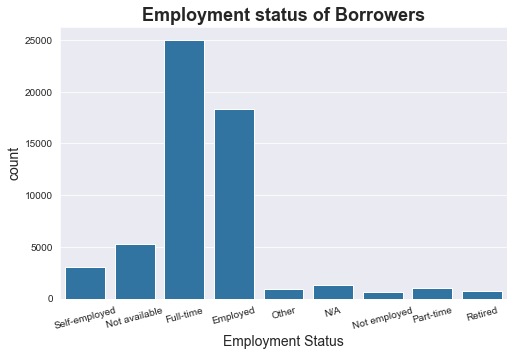

In [36]:
graph_settings("Employment status of Borrowers")
graph = sns.countplot(data=prosper_loan_clean, x="EmploymentStatus", color=base_color)
graph.set_xlabel("Employment Status")
plt.xticks(rotation=15);

#### Observations:

The above graph shows that most borrowers work full-time, coming behind are those that employed.

#### What is the occupation of most borrowers?

I want to select the top 20 occupation from the dataset

In [37]:
# Selecting top 20 occupation
top_20 = prosper_loan_clean.Occupation.value_counts()[:20]
prosper_occ = prosper_loan_clean.loc[prosper_loan_clean.Occupation.isin(top_20.index)]

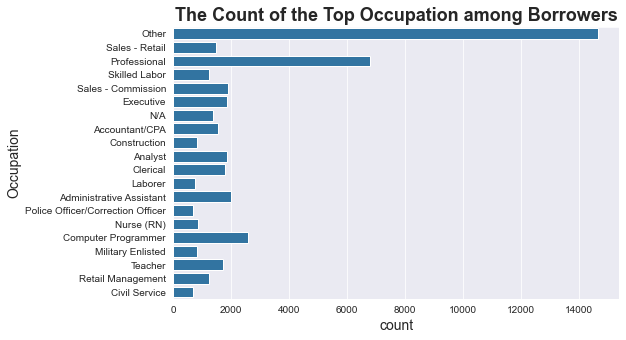

In [38]:
graph_settings("The Count of the Top Occupation among Borrowers")
sns.countplot(data=prosper_occ, y= "Occupation", color=base_color);

#### Observations:

The graph above shoes that most borrowers did not specify any occupation, which they refered to  as `other`. and others too identified their occupation as professionals.

#### Which listing category has the most representation?

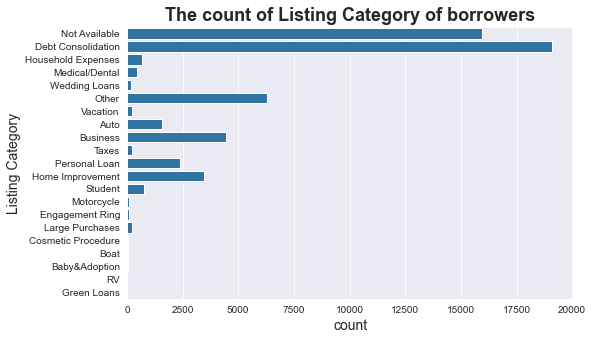

In [39]:
# Plotting the graph
graph_settings("The count of Listing Category of borrowers")
graph = sns.countplot(data=prosper_loan_clean, y="ListingCategory", color=base_color)
graph.set_ylabel("Listing Category");

#### Observations:

The above graph shows that most loan were mostly collected for `Debt Consolidation`, `Home Improvement` and `Business` also have good representation.

#### What is the distribution of `LoanAmount`

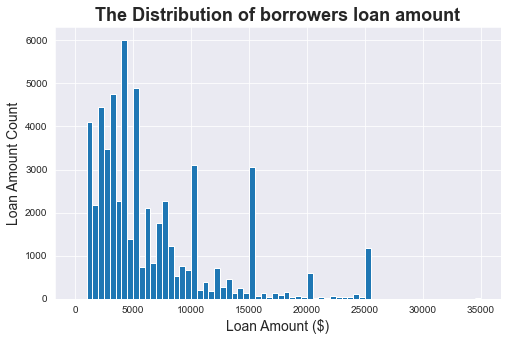

In [40]:
graph_settings("The Distribution of borrowers loan amount", "Loan Amount ($)", "Loan Amount Count")
# selecting the bin size
binsize = 500
bins = np.arange(0, prosper_loan_clean.LoanAmount.max()+binsize, binsize)
# plotting the graph
plt.hist(data = prosper_loan_clean, x = 'LoanAmount', bins = bins);

Let me still transform the data with  a log scale

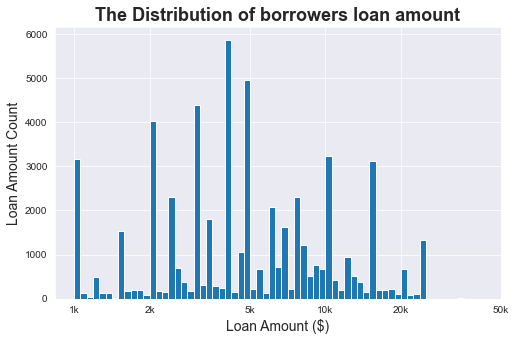

In [41]:
graph_settings("The Distribution of borrowers loan amount", "Loan Amount ($)", "Loan Amount Count")
# selecting the bin size
binsize = 0.025
bins = 10 ** np.arange(3, np.log10(prosper_loan_clean.LoanAmount.max())+binsize, binsize)

# plotting the graph
plt.hist(data = prosper_loan_clean, x = 'LoanAmount', bins = bins)
plt.xscale("log")
plt.xticks([1e3, 2e3, 5e3, 1e4, 2e4, 5e4], ['1k', '2k', '5k', '10k', '20k', '50k']);

#### Observation:

There is not much insight after the log transformation, with both graphs showing that approximately `4000` is the most borrowed amount, followed by `5000`, the graph also shows that most money borrowed is betwween `2000` and `5000`, while above `5000`, people mostly borrowed `10000` and `15000`, with `25000` being the highest amount borrowd.

#### What is the borrow rate of the borrowers?

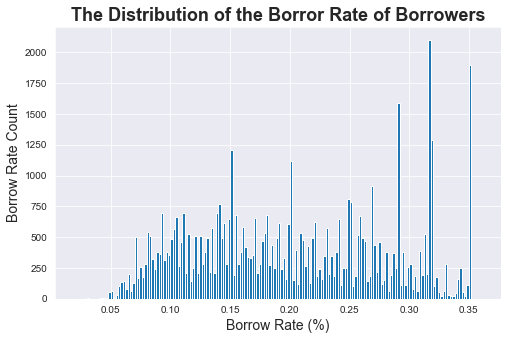

In [42]:
graph_settings("The Distribution of the Borror Rate of Borrowers", "Borrow Rate (%)", "Borrow Rate Count")
binsize = 0.002
bins = np.arange(0.02, prosper_loan_clean.BorrowerRate.max() + binsize, binsize)
plt.hist(data = prosper_loan_clean, x = 'BorrowerRate', bins = bins);
#plt.xlim(0.05, 0.30)

#### Observations:

The borrow rate is quite spread out with highest peak at `0.35`,  followed by peaks `0.30`, `0.28` and `0.35`.

> The variable of interest is `LoanStatus`, was previously a categorical variable, But I Changed the form of the data to  binary (1, 0), this is help answer the question of whether a borrower defaulted or not.

> When investigating the `LoanAmount` variable, a number of outlier points were identified. Overall, these points can be characterized by yearly income, entered as monthly income, all of these points were removed from the dataset in order to zoom in the areas where most datapoints fall. I then performed transformations log transfomations on Loan Amount as the data was skewed to the right. 
I performed a log transformation on the deliquecies variables, and `MonthlyIncome` variable to make the graph more interpretable


## Bivariate Exploration

I will now start investigating relationships among the variables that explored in the previous section

In [43]:
cat_vars = prosper_loan_clean.select_dtypes(include="object").columns
num_vars = prosper_loan_clean.select_dtypes(include=[int, float]).columns
num_vars

Index(['Term', 'LoanStatus', 'LoanAmount', 'ProsperRatingNumeric',
       'ProsperScore', 'BorrowerRate', 'MonthlyIncome',
       'DelinquenciesLast7Years', 'CurrentDelinquencies'],
      dtype='object')

#### What is the relationship between `DelinquenciesLast7Years` and loan status?

Text(0, 0.5, '')

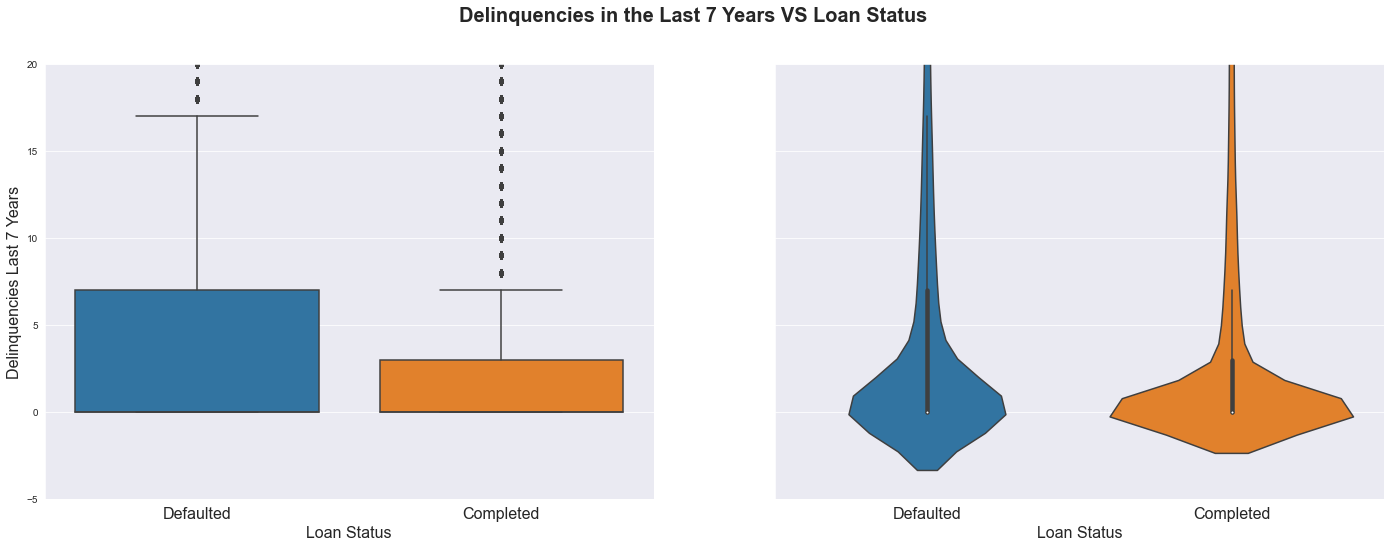

In [44]:
    fig, ax = plt.subplots(ncols=2, figsize=[24, 8], sharey=True)
    plt.suptitle("Delinquencies in the Last 7 Years VS Loan Status", fontsize=20, fontweight="bold")
    sns.boxplot(data=prosper_loan_clean, x="LoanStatus", y="DelinquenciesLast7Years", ax=ax[0])
    ax[0].set_ylim(-5, 20)
    ax[0].set_xlabel("Loan Status", fontsize=16)
    ax[0].set_ylabel("Delinquencies Last 7 Years", fontsize=16)
    ax[0].set_xticklabels(["Defaulted", "Completed"], fontsize=16)

    sns.violinplot(data=prosper_loan_clean, x="LoanStatus", y="DelinquenciesLast7Years", ax=ax[1])
    ax[1].set_xlabel("Loan Status", fontsize=16)
    ax[1].set_xticklabels(["Defaulted", "Completed"], fontsize=16)
    ax[1].set_ylabel("")


#### Observations:

From the graph clearly shows that those borrowers who have deliquencies the past 7 years are more likely to default than complete their loan payment.

#### What is the relationship between `CurrentDelinquencies` and loan status?

Text(0, 0.5, '')

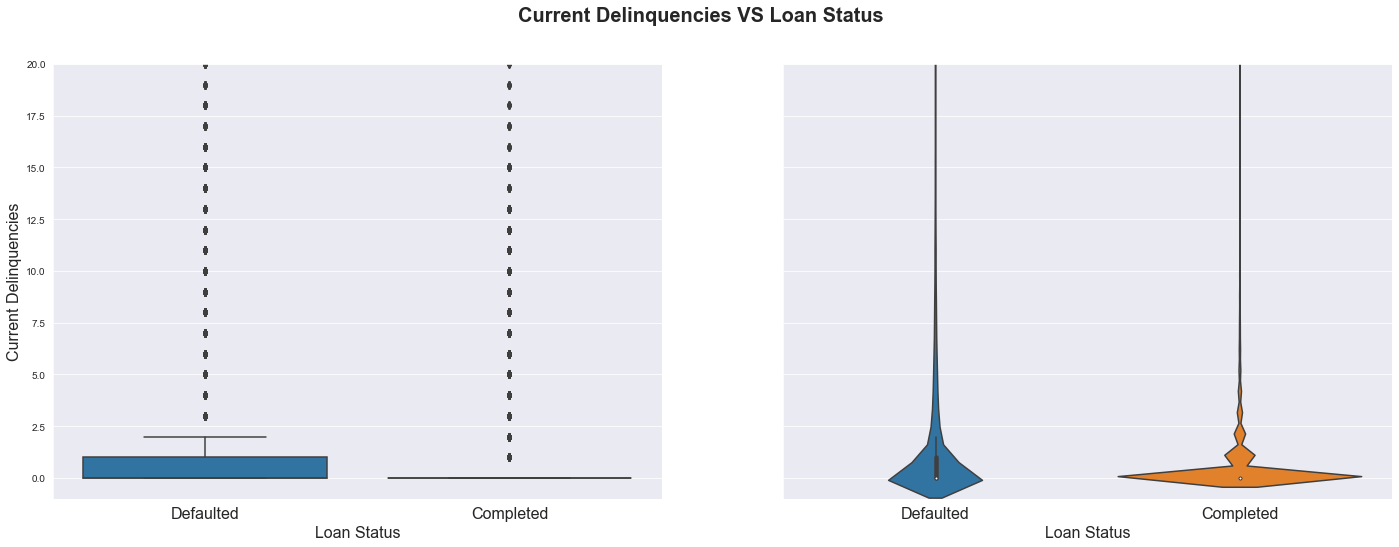

In [45]:
fig, ax = plt.subplots(ncols=2, figsize=[24, 8], sharey=True)
plt.suptitle("Current Delinquencies VS Loan Status", fontsize=20, fontweight="bold")
sns.boxplot(data=prosper_loan_clean, x="LoanStatus", y="CurrentDelinquencies", ax=ax[0])
ax[0].set_ylim(-1, 20)
ax[0].set_xlabel("Loan Status", fontsize=16)
ax[0].set_ylabel("Current Delinquencies", fontsize=16)
ax[0].set_xticklabels(["Defaulted", "Completed"], fontsize=16)

sns.violinplot(data=prosper_loan_clean, x="LoanStatus", y="CurrentDelinquencies", ax=ax[1])
ax[1].set_xlabel("Loan Status", fontsize=16)
ax[1].set_xticklabels(["Defaulted", "Completed"], fontsize=16)
ax[1].set_ylabel("")


#### Observations

The graph above shows that borrowers who dont have any current deliquencies are likely to completed their loan payment.

#### What is the relationship between `ProsperScore` and loan status?

Text(0, 0.5, 'Loan Status')

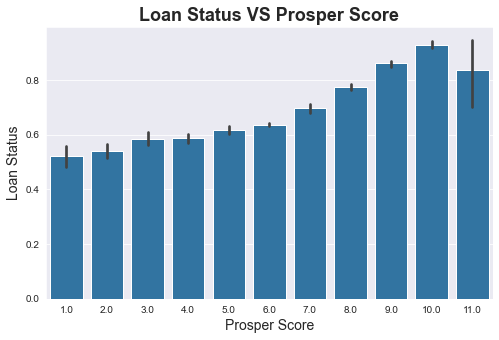

In [46]:
graph_settings("Loan Status VS Prosper Score")
sns.barplot(data=prosper_loan_clean, x="ProsperScore", y="LoanStatus", color=base_color)
plt.xlabel("Prosper Score")
plt.ylabel("Loan Status")

#### Observation

We can see clearly that Prosper score is a good metric to predict whether a loan will default or not. With higher score  being most likely to complete their loan (closer to 1)  than lower score (closer to 0),those with a prosper score of 10 has higher chance of not defaulting. Interestingly, Those loans with ratings of 9 and 10, did better than loans with rating of 11. There seem to be variability in the plotted data.

#### What is the relationship between `ProsperRatingNumeric` and loan status?

Text(0, 0.5, 'Loan Status')

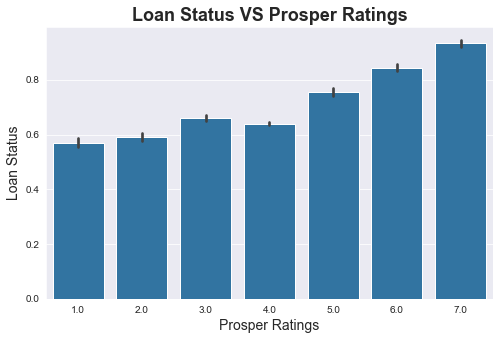

In [47]:
graph_settings("Loan Status VS Prosper Ratings")
sns.barplot(data=prosper_loan_clean, x="ProsperRatingNumeric", y="LoanStatus", color=base_color)
plt.xlabel("Prosper Ratings")
plt.ylabel("Loan Status")
#plt.xticks()

#### Observation: 

As with Prosper Score, Prosper ratings is also a good metric to predict whether a loan will default or not. With higher ratings  being most likely to complete their loan (closer to 1)  than lower ratings (closer to 0),those with a prosper rating of 7 has higher chance of not defaulting.

#### What is the relationship between `MonthlyIncome` and loan status?

Text(0, 0.5, '')

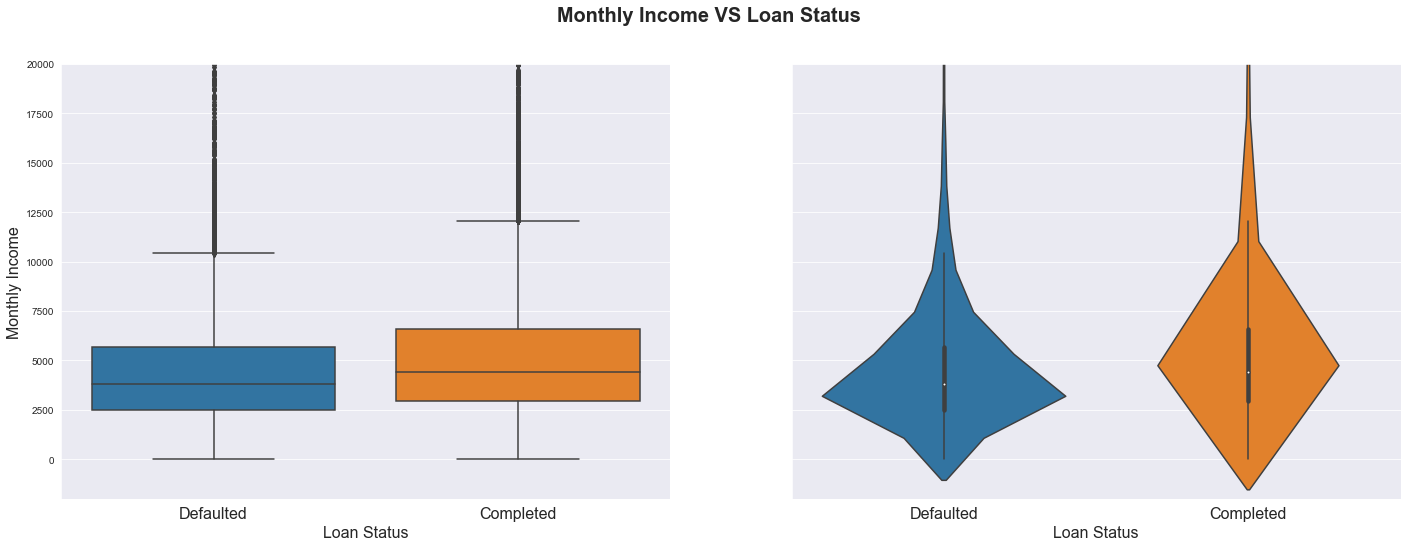

In [48]:
fig, ax = plt.subplots(ncols=2, figsize=[24, 8], sharey=True)
plt.suptitle("Monthly Income VS Loan Status", fontsize=20, fontweight="bold")
sns.boxplot(data=prosper_loan_clean, x="LoanStatus", y="MonthlyIncome", ax=ax[0])
ax[0].set_ylim(-2000, 20000)
ax[0].set_xlabel("Loan Status", fontsize=16)
ax[0].set_ylabel("Monthly Income", fontsize=16)
ax[0].set_xticklabels(["Defaulted", "Completed"], fontsize=16)

sns.violinplot(data=prosper_loan_clean, x="LoanStatus", y="MonthlyIncome", ax=ax[1])
ax[1].set_xlabel("Loan Status", fontsize=16)
ax[1].set_xticklabels(["Defaulted", "Completed"], fontsize=16)
ax[1].set_ylabel("")


#### Observations:

From my obervation, people who have higher stated monthly income defaulted less than those lower income.

#### What is the relationship between `Loan Amount` and loan status?

Text(0, 0.5, '')

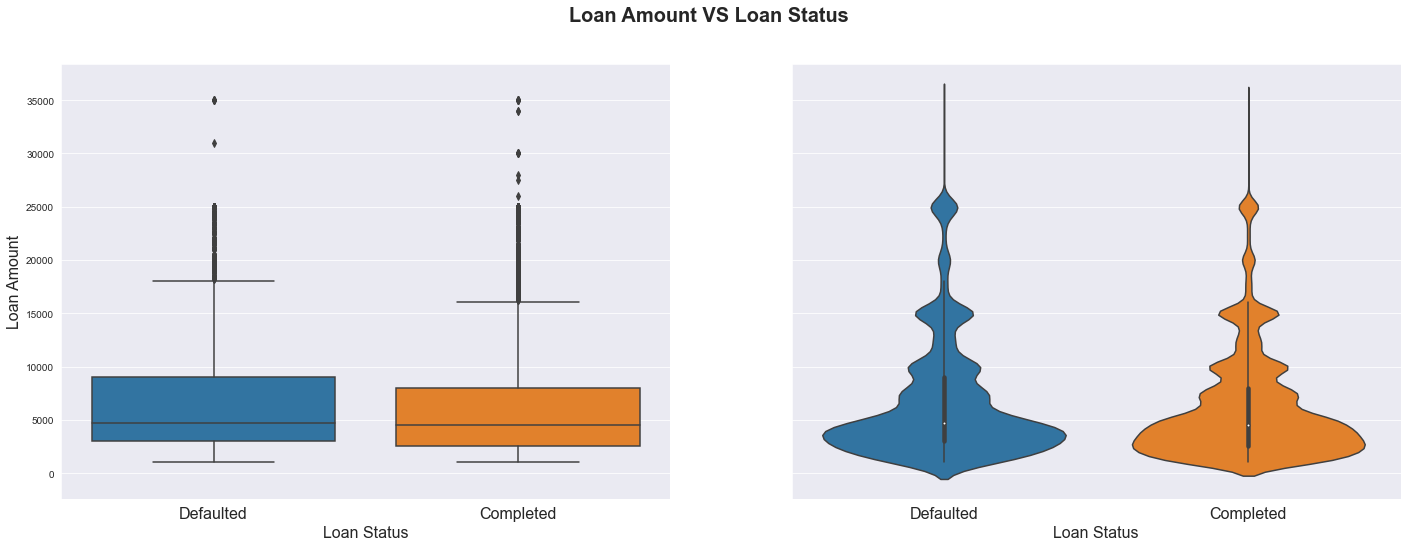

In [49]:
fig, ax = plt.subplots(ncols=2, figsize=[24, 8], sharey=True)
plt.suptitle("Loan Amount VS Loan Status", fontsize=20, fontweight="bold")
sns.boxplot(data=prosper_loan_clean, x="LoanStatus", y="LoanAmount", ax=ax[0])
ax[0].set_xlabel("Loan Status", fontsize=16)
ax[0].set_ylabel("Loan Amount", fontsize=16)
ax[0].set_xticklabels(["Defaulted", "Completed"], fontsize=16)

sns.violinplot(data=prosper_loan_clean, x="LoanStatus", y="LoanAmount", ax=ax[1])
ax[1].set_xlabel("Loan Status", fontsize=16)
ax[1].set_xticklabels(["Defaulted", "Completed"], fontsize=16)
ax[1].set_ylabel("")


#### Observation:

As I expected, those who defaulted took a slightly higher loan than those who completed their loan payment, but not by much.

#### What is the relationship between `Loan Amount` and loan status?


Text(0, 0.5, '')

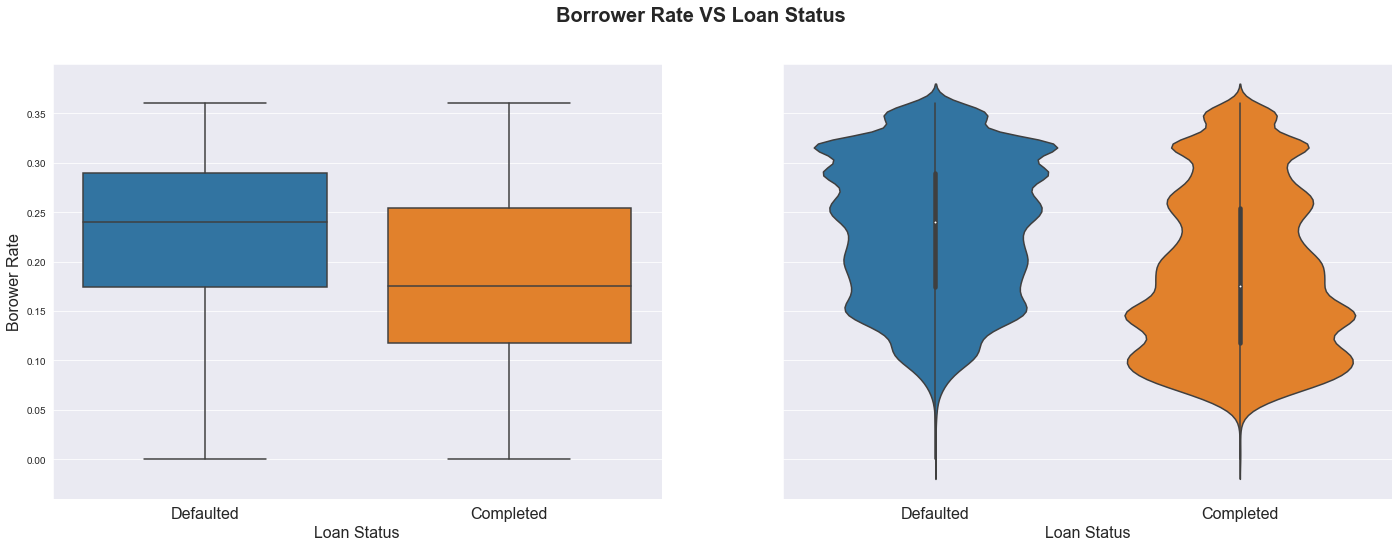

In [50]:
fig, ax = plt.subplots(ncols=2, figsize=[24, 8], sharey=True)
plt.suptitle("Borrower Rate VS Loan Status", fontsize=20, fontweight="bold")
sns.boxplot(data=prosper_loan_clean, x="LoanStatus", y="BorrowerRate", ax=ax[0])
ax[0].set_xlabel("Loan Status", fontsize=16)
ax[0].set_ylabel("Borower Rate", fontsize=16)
ax[0].set_xticklabels(["Defaulted", "Completed"], fontsize=16)

sns.violinplot(data=prosper_loan_clean, x="LoanStatus", y="BorrowerRate", ax=ax[1])
ax[1].set_xlabel("Loan Status", fontsize=16)
ax[1].set_xticklabels(["Defaulted", "Completed"], fontsize=16)
ax[1].set_ylabel("")


#### Observation

From my observation, the borrowers who defaulted paid about 5% interest rate more than those who defaulted. There a very strong relationship here. 

#### What is the relationship between `Listing Category` and loan status?


Text(0, 0.5, 'Listing Category')

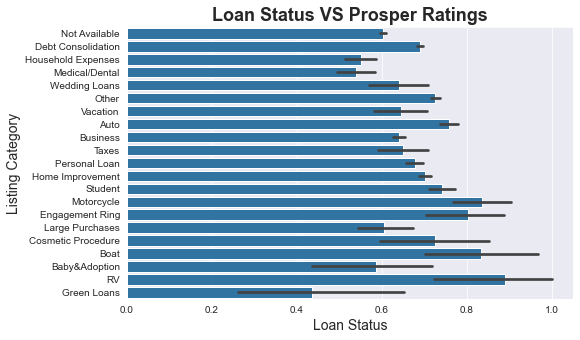

In [51]:
graph_settings("Loan Status VS Prosper Ratings")
sns.barplot(data=prosper_loan_clean, x="LoanStatus", y="ListingCategory", color=base_color)
plt.xlabel("Loan Status")
plt.ylabel("Listing Category")

#### Observation:

The graph shows that `RV`, `Motorcycle` and `Boat` loans are most likely not to default. While `Green` Loan is the most likely.

#### What is the relationship between `Employment Status` and loan status?


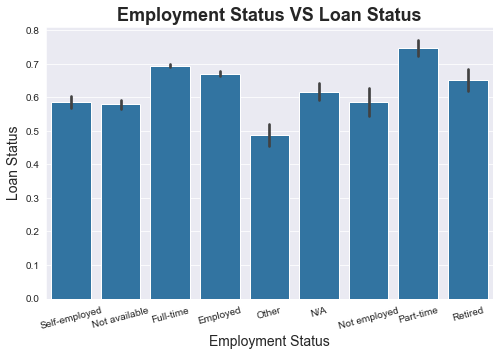

In [52]:
graph_settings("Employment Status VS Loan Status")
sns.barplot(data=prosper_loan_clean, x="EmploymentStatus", y="LoanStatus", color=base_color)
plt.xlabel("Employment Status")
plt.ylabel("Loan Status")
plt.xticks(rotation=15);

#### Observation

We can see from the graph above that part-time workers defaulted less often than fulll-time workers. While the workers who were listed as `other` defaulted more than those unemployed

#### What is the relationship between Monthly Income and Prosper ratings?


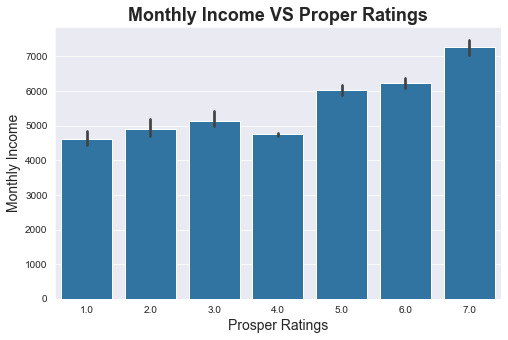

In [53]:
graph_settings("Monthly Income VS Proper Ratings")
sns.barplot(data=prosper_loan_clean, x="ProsperRatingNumeric", y="MonthlyIncome", color=base_color)
plt.xlabel("Prosper Ratings")
plt.ylabel("Monthly Income");

#### Observation:

Those with higher prosper ratings, have a higher monthly income than those with lower ratings

#### What is the relationship between Monthly Income and Prosper Score?

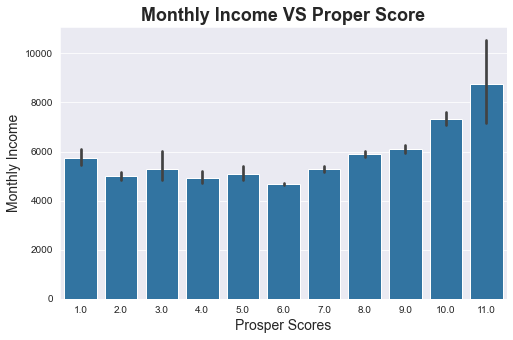

In [54]:
graph_settings("Monthly Income VS Proper Score")
sns.barplot(data=prosper_loan_clean, x="ProsperScore", y="MonthlyIncome", color=base_color)
plt.xlabel("Prosper Scores")
plt.ylabel("Monthly Income");

#### Observation: 

The borrowers with the highest rating (11) earned the highest monthly income. Interestingly, those with a lowest rating(1) have a higher income than those with a rating of (6). But the error bar in rating (11) shows that there is variability in the data.

#### What is the relationship between Monthly Income and Employment Status?

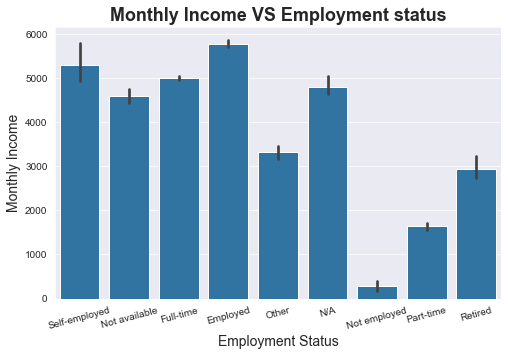

In [55]:
graph_settings("Monthly Income VS Employment status")
sns.barplot(data=prosper_loan_clean, x="EmploymentStatus", y="MonthlyIncome", color=base_color)
plt.xlabel("Employment Status")
plt.ylabel("Monthly Income")
plt.xticks(rotation=15);

#### Observation: 

Those who identified as `employed`, `Self-employed`, and `full-time` have high monthly income, compared to others.

> In this section, I explored the relationship between the variable of interest and the other variables, I also explored the relationships amonng the other variables. It led me to some intersting insights: borrowers that have deliquencies are more likely to default, and also, a  proper rating and score can be used to predict the likelihood of a loan defaulting or not.

## Multivariate Exploration



#### What is the relationship between Loan Status, Monthly Income, and Prosper Ratings?

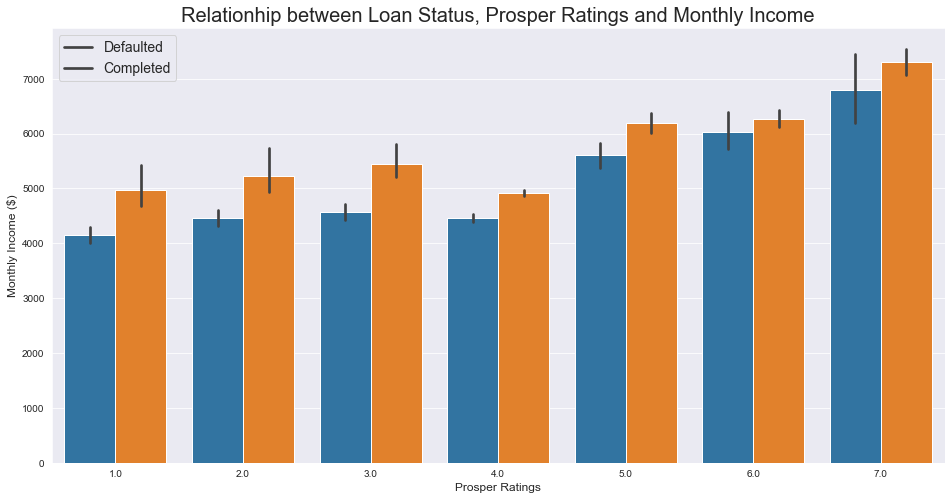

In [56]:
plt.figure(figsize=[16, 8])
sns.barplot(data=prosper_loan_clean, x="ProsperRatingNumeric", y="MonthlyIncome", hue="LoanStatus")
plt.title("Relationhip between Loan Status, Prosper Ratings and Monthly Income", fontsize=20)
plt.xlabel("Prosper Ratings", fontsize=12)
plt.ylabel("Monthly Income ($)", fontsize=12)
plt.legend(labels=["Defaulted", "Completed"], fontsize=14);

#### Observation

This multivariate plot above shows that the borrowers that have higher ratings and also have higher monthly income are more likely to complete their loan payment, and less likely to default.

#### What is the relationship between Loan Status, Monthly Income, and Prosper Score?

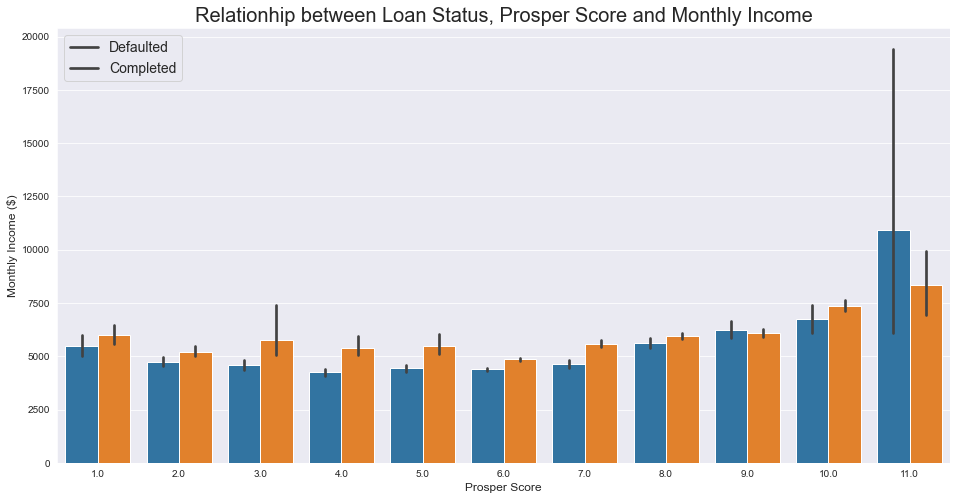

In [57]:
plt.figure(figsize=[16, 8])
sns.barplot(data=prosper_loan_clean, x="ProsperScore", y="MonthlyIncome", hue="LoanStatus")
plt.title("Relationhip between Loan Status, Prosper Score and Monthly Income", fontsize=20)
plt.xlabel("Prosper Score", fontsize=12)
plt.ylabel("Monthly Income ($)", fontsize=12)
plt.legend(labels=["Defaulted", "Completed"], fontsize=14);

#### Observation:

Here, also, we see that borrowers with higher ratings and higher monthly income are less likely to default. We see that the best perfoming loans have a rating of (10), and that there is a high variance in default rate for highly rated loans.

#### What is the relationship between Loan Status, Monthly Income, and Employment Status?

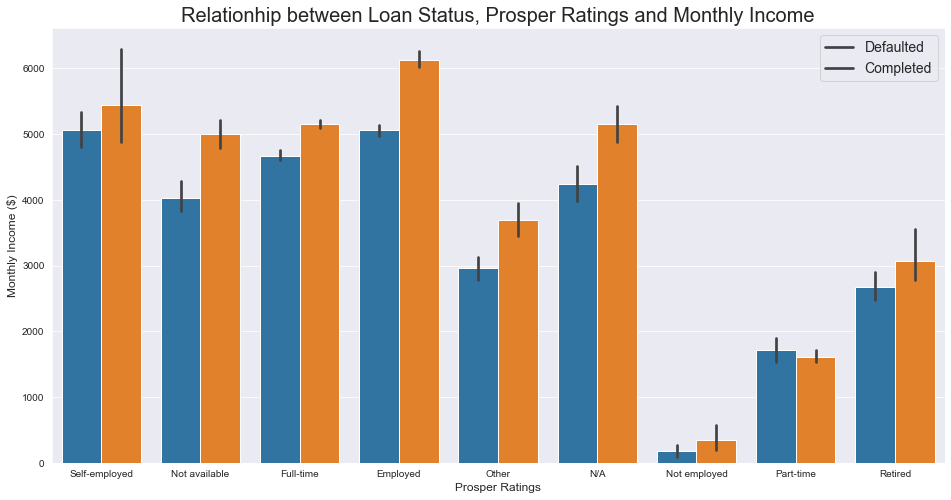

In [58]:
plt.figure(figsize=[16, 8])
sns.barplot(data=prosper_loan_clean, x="EmploymentStatus", y="MonthlyIncome", hue="LoanStatus")
plt.title("Relationhip between Loan Status, Prosper Ratings and Monthly Income", fontsize=20)
plt.xlabel("Prosper Ratings", fontsize=12)
plt.ylabel("Monthly Income ($)", fontsize=12)
plt.legend(labels=["Defaulted", "Completed"], fontsize=14)

#### Observation

The above graph shows that borrowers that whose employed status is `employed`, and have high monthly income are mostly likely to complete their loan payment. Followed by `full-time` and self-employed. Not surprise really that thoseemployment status is `Not Employed` have low monthly income, and they loans that are mostly likely to deafault.

- This part of the investigation is build up on what I have done in the previous section. It has reinforced my the insights I got earlier that Monthly income of borrowers affect their proper rating and score, which in turn can be used too predict there Loan status, whether they will default or not. 

- The interesting interations I got is that, there is a high variance in high prosper scores, with prosper score of 10, doing better than 11.

## Conclusions


> In this project, I worked on Prosperloan dataset which has over 100,000 rows and 81 variables, but I limited my work to 15 variables for the purpose of this project. I investigated the dataset to gain insight into what factors can be used to predict loan status. I performed preliminary wrangling on the dataset to prepare it for the  visualizations that I wil carry out. During my exploration, I performed univariate, bivariate and multivariate visualizations. 
Then, I was able to find out that there is strong relationship between Monthly Income and prosper ratings and score. The higher the Monthly income, the higher rating and score, which can be used in predicting a loan status.